In [15]:
import pandas as pd
from src.plot import *
import numpy as np
from src.stat import chi_2
import datetime
from dateutil.relativedelta import relativedelta
pd.options.display.float_format = "{:,.2f}".format

In [16]:
df = pd.read_csv('loan.csv')

In [17]:
#Select apropriate columns

numerical = df.select_dtypes('number').columns
dates = ['issue_d','earliest_cr_line','last_pymnt_d']
categorical = df.select_dtypes('object').columns
categorical = [c for c in categorical if c not in dates]

In [18]:
#convert dates

for d in dates:
    df[d] = pd.to_datetime(df[d],format='%b-%Y')

In [19]:
# convert term into no months

df['term'] = df['term'].str.extract(r'(\d{2})').astype('int')


In [20]:
# now I will check if letter in grade = letter in subgrade 

df['grade_check'] = df.apply(lambda x: x['grade'] in x['sub_grade'], axis = 1)

#all good DQ checked


In [21]:
default_columns = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
df['target'] = df['loan_status'].apply(lambda x: 1 if x in default_columns else 0)

In [22]:
df.groupby('grade')['target'].mean()
#as expected the highest default rate is in the most risky 

grade
A   0.03
B   0.08
C   0.14
D   0.20
E   0.28
F   0.36
G   0.40
Name: target, dtype: float64

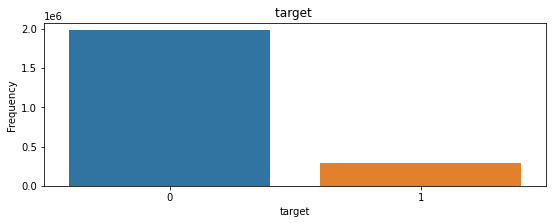

<module 'matplotlib.pyplot' from '/Users/aleksandram/.local/share/virtualenvs/PD-scoring-Yvrhi1rQ/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [23]:
plot_cnt(df, 'target')

#looks like unbalanced dataset

In [24]:
# there is 12% default rate
df['target'].mean()

0.1257787521210545

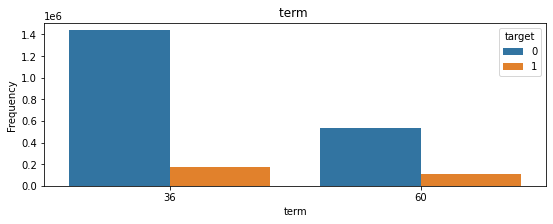

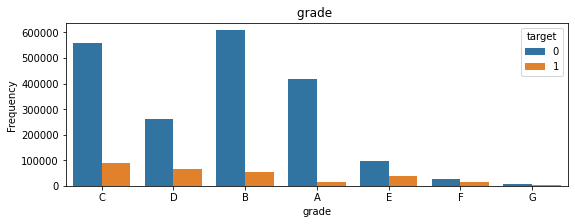

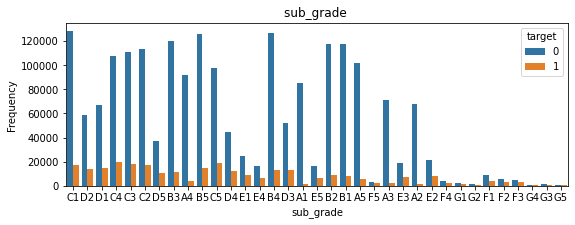

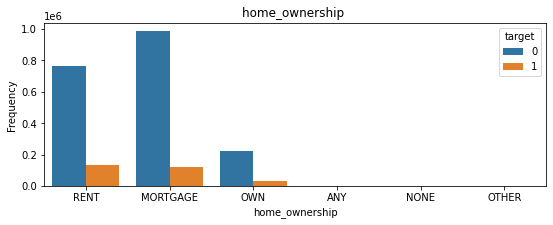

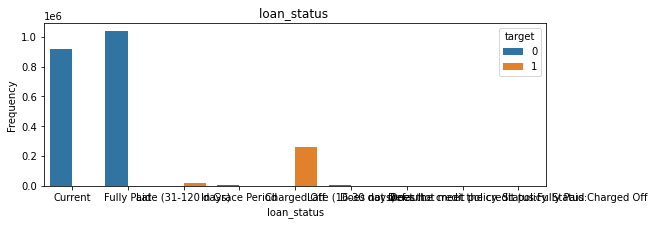

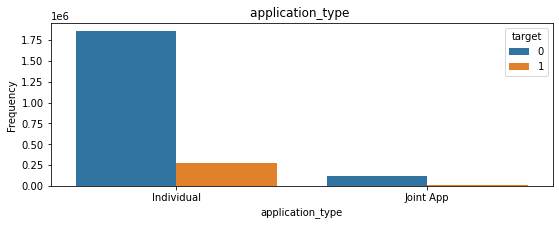

In [25]:
for c in categorical:
    plot_cnt(df,c, hue='target')

In [26]:
for c in categorical:
    print(c)
    chi_2(df, c)


# All categorical features have impact on target variable

term
chi_2 statistic: 17424.80
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
grade
chi_2 statistic: 117793.16
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
sub_grade
chi_2 statistic: 122147.03
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
home_ownership
chi_2 statistic: 6269.62
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
loan_status
chi_2 statistic: 2260668.00
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency
application_type
chi_2 statistic: 4201.08
p_value: 0.00
significant level 0.05
Reject H0, variables have dependency


In [27]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type,grade_check,target
0,36,13.56,84.92,C,C1,RENT,"55,000.00",2018-12-01,Current,18.24,2001-04-01,0.00,2019-02-01,Individual,True,0
1,60,18.94,777.23,D,D2,MORTGAGE,"90,000.00",2018-12-01,Current,26.52,1987-06-01,0.00,2019-02-01,Individual,True,0
2,36,17.97,180.69,D,D1,MORTGAGE,"59,280.00",2018-12-01,Current,10.51,2011-04-01,0.00,2019-02-01,Individual,True,0
3,36,18.94,146.51,D,D2,MORTGAGE,"92,000.00",2018-12-01,Current,16.74,2006-02-01,0.00,2019-02-01,Individual,True,0
4,60,16.14,731.78,C,C4,MORTGAGE,"57,250.00",2018-12-01,Current,26.35,2000-12-01,0.00,2019-02-01,Individual,True,0


In [28]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type,grade_check,target
0,36,13.56,84.92,C,C1,RENT,"55,000.00",2018-12-01,Current,18.24,2001-04-01,0.00,2019-02-01,Individual,True,0
1,60,18.94,777.23,D,D2,MORTGAGE,"90,000.00",2018-12-01,Current,26.52,1987-06-01,0.00,2019-02-01,Individual,True,0
2,36,17.97,180.69,D,D1,MORTGAGE,"59,280.00",2018-12-01,Current,10.51,2011-04-01,0.00,2019-02-01,Individual,True,0
3,36,18.94,146.51,D,D2,MORTGAGE,"92,000.00",2018-12-01,Current,16.74,2006-02-01,0.00,2019-02-01,Individual,True,0
4,60,16.14,731.78,C,C4,MORTGAGE,"57,250.00",2018-12-01,Current,26.35,2000-12-01,0.00,2019-02-01,Individual,True,0


### New features

In [29]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [30]:
df['monthly_inc'] = df['annual_inc']/12
df['expected_payment_dt'] = df.apply(lambda x: x['issue_d'] + relativedelta(months=x['term']), axis =1)
df['months_paid'] = df.apply(lambda x: diff_month(x['last_pymnt_d'],x['issue_d']), axis=1)

In [31]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type,grade_check,target,monthly_inc,expected_payment_dt,months_paid
0,36,13.56,84.92,C,C1,RENT,"55,000.00",2018-12-01,Current,18.24,2001-04-01,0.00,2019-02-01,Individual,True,0,"4,583.33",2021-12-01,2.00
1,60,18.94,777.23,D,D2,MORTGAGE,"90,000.00",2018-12-01,Current,26.52,1987-06-01,0.00,2019-02-01,Individual,True,0,"7,500.00",2023-12-01,2.00
2,36,17.97,180.69,D,D1,MORTGAGE,"59,280.00",2018-12-01,Current,10.51,2011-04-01,0.00,2019-02-01,Individual,True,0,"4,940.00",2021-12-01,2.00
3,36,18.94,146.51,D,D2,MORTGAGE,"92,000.00",2018-12-01,Current,16.74,2006-02-01,0.00,2019-02-01,Individual,True,0,"7,666.67",2021-12-01,2.00
4,60,16.14,731.78,C,C4,MORTGAGE,"57,250.00",2018-12-01,Current,26.35,2000-12-01,0.00,2019-02-01,Individual,True,0,"4,770.83",2023-12-01,2.00


In [32]:
df['pure_installment'] = df['installment']/(1+df['int_rate']/100)
df['total_installement'] = df['installment']*12
df['total_installement_pure'] = df['pure_installment']
df['relationship_months'] = df.apply(lambda x: diff_month(x['issue_d'],x['earliest_cr_line']), axis=1)

In [33]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,...,application_type,grade_check,target,monthly_inc,expected_payment_dt,months_paid,pure_installment,total_installement,total_installement_pure,relationship_months
0,36,13.56,84.92,C,C1,RENT,"55,000.00",2018-12-01,Current,18.24,...,Individual,True,0,"4,583.33",2021-12-01,2.00,74.78,"1,019.04",74.78,212.00
1,60,18.94,777.23,D,D2,MORTGAGE,"90,000.00",2018-12-01,Current,26.52,...,Individual,True,0,"7,500.00",2023-12-01,2.00,653.46,"9,326.76",653.46,378.00
2,36,17.97,180.69,D,D1,MORTGAGE,"59,280.00",2018-12-01,Current,10.51,...,Individual,True,0,"4,940.00",2021-12-01,2.00,153.17,"2,168.28",153.17,92.00
3,36,18.94,146.51,D,D2,MORTGAGE,"92,000.00",2018-12-01,Current,16.74,...,Individual,True,0,"7,666.67",2021-12-01,2.00,123.18,"1,758.12",123.18,154.00
4,60,16.14,731.78,C,C4,MORTGAGE,"57,250.00",2018-12-01,Current,26.35,...,Individual,True,0,"4,770.83",2023-12-01,2.00,630.08,"8,781.36",630.08,216.00


In [34]:
df.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [35]:
df[df.loan_status =='In Grace Period']

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,...,application_type,grade_check,target,monthly_inc,expected_payment_dt,months_paid,pure_installment,total_installement,total_installement_pure,relationship_months
4195,60,16.91,272.85,C,C5,MORTGAGE,"97,000.00",2018-12-01,In Grace Period,28.79,...,Individual,True,0,"8,083.33",2023-12-01,1.00,233.38,"3,274.20",233.38,202.00
4605,36,14.47,240.85,C,C2,MORTGAGE,"35,000.00",2018-12-01,In Grace Period,23.08,...,Individual,True,0,"2,916.67",2021-12-01,1.00,210.40,"2,890.20",210.40,105.00
8899,36,16.14,352.27,C,C4,MORTGAGE,"82,500.00",2018-12-01,In Grace Period,16.33,...,Individual,True,0,"6,875.00",2021-12-01,1.00,303.31,"4,227.24",303.31,212.00
9106,36,16.14,"1,197.70",C,C4,MORTGAGE,"20,000.00",2018-12-01,In Grace Period,54.86,...,Joint App,True,0,"1,666.67",2021-12-01,1.00,"1,031.26","14,372.40","1,031.26",200.00
9149,36,13.56,"1,018.93",C,C1,RENT,"85,000.00",2018-12-01,In Grace Period,2.91,...,Individual,True,0,"7,083.33",2021-12-01,2.00,897.26,"12,227.16",897.26,163.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259635,60,17.09,418.34,D,D1,MORTGAGE,"67,500.00",2017-10-01,In Grace Period,23.93,...,Individual,True,0,"5,625.00",2022-10-01,16.00,357.28,"5,020.08",357.28,121.00
2259957,36,10.42,"1,038.88",B,B3,RENT,"150,000.00",2017-10-01,In Grace Period,7.35,...,Individual,True,0,"12,500.00",2020-10-01,16.00,940.84,"12,466.56",940.84,129.00
2260048,36,24.85,687.47,E,E3,MORTGAGE,"90,000.00",2017-10-01,In Grace Period,10.77,...,Individual,True,0,"7,500.00",2020-10-01,16.00,550.64,"8,249.64",550.64,74.00
2260356,36,15.05,287.06,C,C4,RENT,"35,000.00",2017-10-01,In Grace Period,21.26,...,Individual,True,0,"2,916.67",2020-10-01,16.00,249.51,"3,444.72",249.51,183.00


In [37]:
#I would be interested in 1st rate that occured

#Filtering out Current, in grace period, curren
valid = default_columns + ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
dfv = df[df.loan_status.isin(valid)].copy()

#filtering DQ issue where Income is 0 
#dfv = dfv[dfv]

print(df[df.loan_status.isin(valid)].shape)
print(df[df.loan_status.isin(valid)]['target'].mean())

(1328284, 23)
0.21406867808390376


<Figure size 648x216 with 0 Axes>

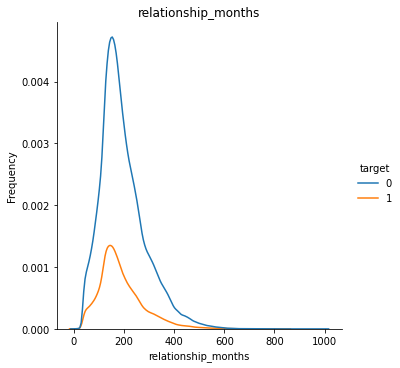

<Figure size 648x216 with 0 Axes>

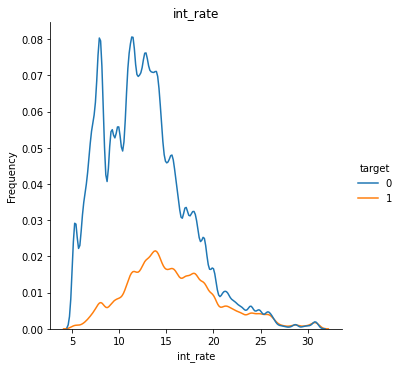

<Figure size 648x216 with 0 Axes>

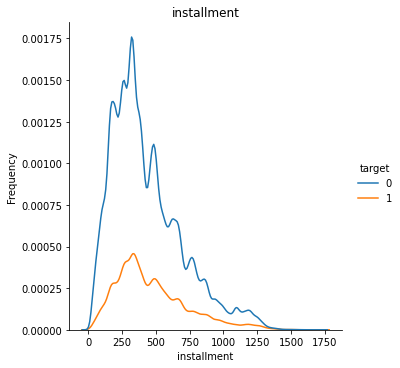

<Figure size 648x216 with 0 Axes>

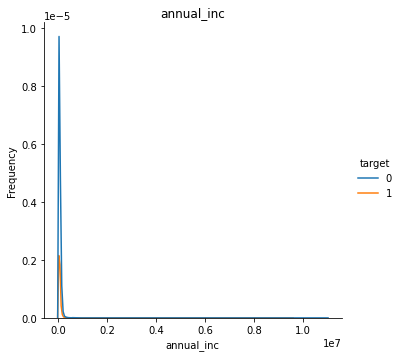

<Figure size 648x216 with 0 Axes>

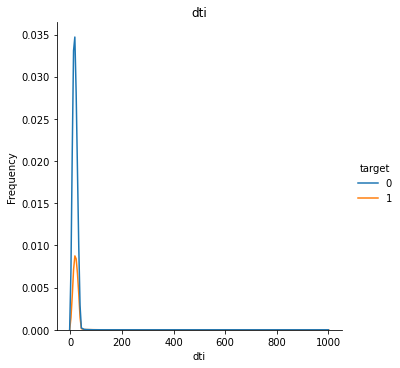

/Users/aleksandram/.local/share/virtualenvs/PD-scoring-Yvrhi1rQ/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 648x216 with 0 Axes>

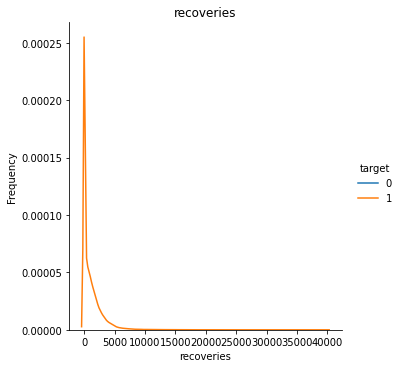

In [24]:
plot_histogram(dfv, 'relationship_months', hue='target')
for c in numerical:
    plot_histogram(dfv,c, hue='target')

In [20]:
dfv.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,...,application_type,grade_check,target,monthly_inc,expected_payment_dt,months_paid,pure_installment,total_installement,total_installement_pure,relationship_months
100,36,22.35,"1,151.16",D,D5,MORTGAGE,"100,000.00",2018-12-01,Fully Paid,30.46,...,Joint App,True,0,"8,333.33",2021-12-01,1.00,940.87,"13,813.92",940.87,83.00
152,60,16.14,975.71,C,C4,MORTGAGE,"45,000.00",2018-12-01,Fully Paid,50.53,...,Joint App,True,0,"3,750.00",2023-12-01,2.00,840.12,"11,708.52",840.12,114.00
170,36,7.56,622.68,A,A3,MORTGAGE,"100,000.00",2018-12-01,Fully Paid,18.92,...,Joint App,True,0,"8,333.33",2021-12-01,2.00,578.91,"7,472.16",578.91,238.00
186,36,11.31,147.99,B,B3,RENT,"38,500.00",2018-12-01,Fully Paid,4.64,...,Individual,True,0,"3,208.33",2021-12-01,2.00,132.95,"1,775.88",132.95,180.00
215,36,27.27,345.18,E,E5,MORTGAGE,"450,000.00",2018-12-01,Fully Paid,12.37,...,Joint App,True,0,"37,500.00",2021-12-01,2.00,271.22,"4,142.16",271.22,254.00


In [ ]:
# Idea: if there was recovery that means customer are abble to pay their debts 

<Figure size 648x216 with 0 Axes>

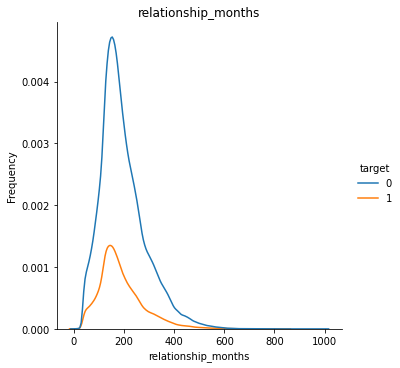

<module 'matplotlib.pyplot' from '/Users/aleksandram/.local/share/virtualenvs/PD-scoring-Yvrhi1rQ/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [34]:
plot_histogram(dfv,'relationship_months', hue='target')
# customers with shorter relationship with the company are more likely to default 

In [35]:
df.head()

,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,recoveries,last_pymnt_d,application_type,grade_check,target
0,36,13.56,84.92,C,C1,RENT,"55,000.00",2018-12-01,Current,18.24,2001-04-01,0.00,2019-02-01,Individual,True,0
1,60,18.94,777.23,D,D2,MORTGAGE,"90,000.00",2018-12-01,Current,26.52,1987-06-01,0.00,2019-02-01,Individual,True,0
2,36,17.97,180.69,D,D1,MORTGAGE,"59,280.00",2018-12-01,Current,10.51,2011-04-01,0.00,2019-02-01,Individual,True,0
3,36,18.94,146.51,D,D2,MORTGAGE,"92,000.00",2018-12-01,Current,16.74,2006-02-01,0.00,2019-02-01,Individual,True,0
4,60,16.14,731.78,C,C4,MORTGAGE,"57,250.00",2018-12-01,Current,26.35,2000-12-01,0.00,2019-02-01,Individual,True,0


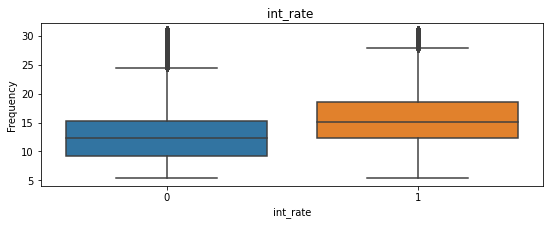

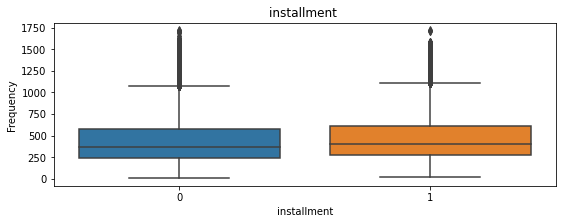

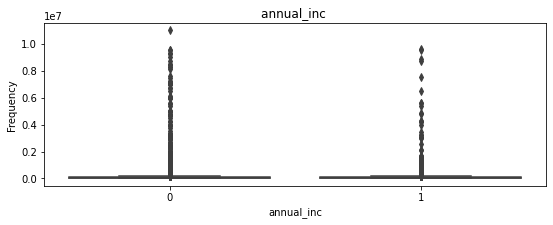

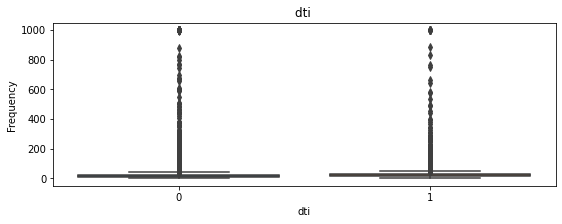

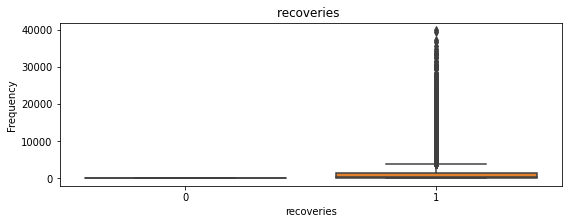

In [38]:
for c in numerical:
    plot_box(dfv,c)